In [5]:
import pandas as pd
from matplotlib import pyplot as plt

In [6]:
def read_from(path):
    rows = []
    with open(path, 'r') as file:
        line = file.readline()[:-2]
        while line != '':
            rows.append(line.split(','))
            line = file.readline()[:-2]

    for i in range(len(rows)):
        rows[i].pop()
        rows[i][0] = int(rows[i][0])
        rows[i][2] = int(rows[i][2])
        rows[i][4] = int(rows[i][4])
        rows[i][10] = int(rows[i][10])
        rows[i][11] = int(rows[i][11])
        rows[i][12] = int(rows[i][12])

    return rows

dataset = read_from('adult_data.csv')
col_labels = ['age', 'work class', 'fnlwgt', 'education',
              'education num', 'marital status', 'occupation',
              'relationship', 'race', 'sex', 'capital gain', 'capital loss',
              'hours-per-week', 'native country']

In [7]:
dataset[:5]

[[39,
  ' State-gov',
  77516,
  ' Bachelors',
  13,
  ' Never-married',
  ' Adm-clerical',
  ' Not-in-family',
  ' White',
  ' Male',
  2174,
  0,
  40,
  ' United-States'],
 [50,
  ' Self-emp-not-inc',
  83311,
  ' Bachelors',
  13,
  ' Married-civ-spouse',
  ' Exec-managerial',
  ' Husband',
  ' White',
  ' Male',
  0,
  0,
  13,
  ' United-States'],
 [38,
  ' Private',
  215646,
  ' HS-grad',
  9,
  ' Divorced',
  ' Handlers-cleaners',
  ' Not-in-family',
  ' White',
  ' Male',
  0,
  0,
  40,
  ' United-States'],
 [53,
  ' Private',
  234721,
  ' 11th',
  7,
  ' Married-civ-spouse',
  ' Handlers-cleaners',
  ' Husband',
  ' Black',
  ' Male',
  0,
  0,
  40,
  ' United-States'],
 [28,
  ' Private',
  338409,
  ' Bachelors',
  13,
  ' Married-civ-spouse',
  ' Prof-specialty',
  ' Wife',
  ' Black',
  ' Female',
  0,
  0,
  40,
  ' Cuba']]

In [8]:
income = pd.DataFrame(data=dataset, columns=col_labels)
income.head(5)

,age,work class,fnlwgt,education,education num,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours-per-week,native country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [9]:
for column in income.columns:
    nas = income[column].isnull().sum()
    print(f'{column}: {nas}')

age: 0
work class: 0
fnlwgt: 0
education: 0
education num: 0
marital status: 0
occupation: 0
relationship: 0
race: 0
sex: 0
capital gain: 0
capital loss: 0
hours-per-week: 0
native country: 0


In [10]:
sub_set = income[['age', 'education', 'occupation']]
sub_set.head(5)

,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
3,53,11th,Handlers-cleaners
4,28,Bachelors,Prof-specialty


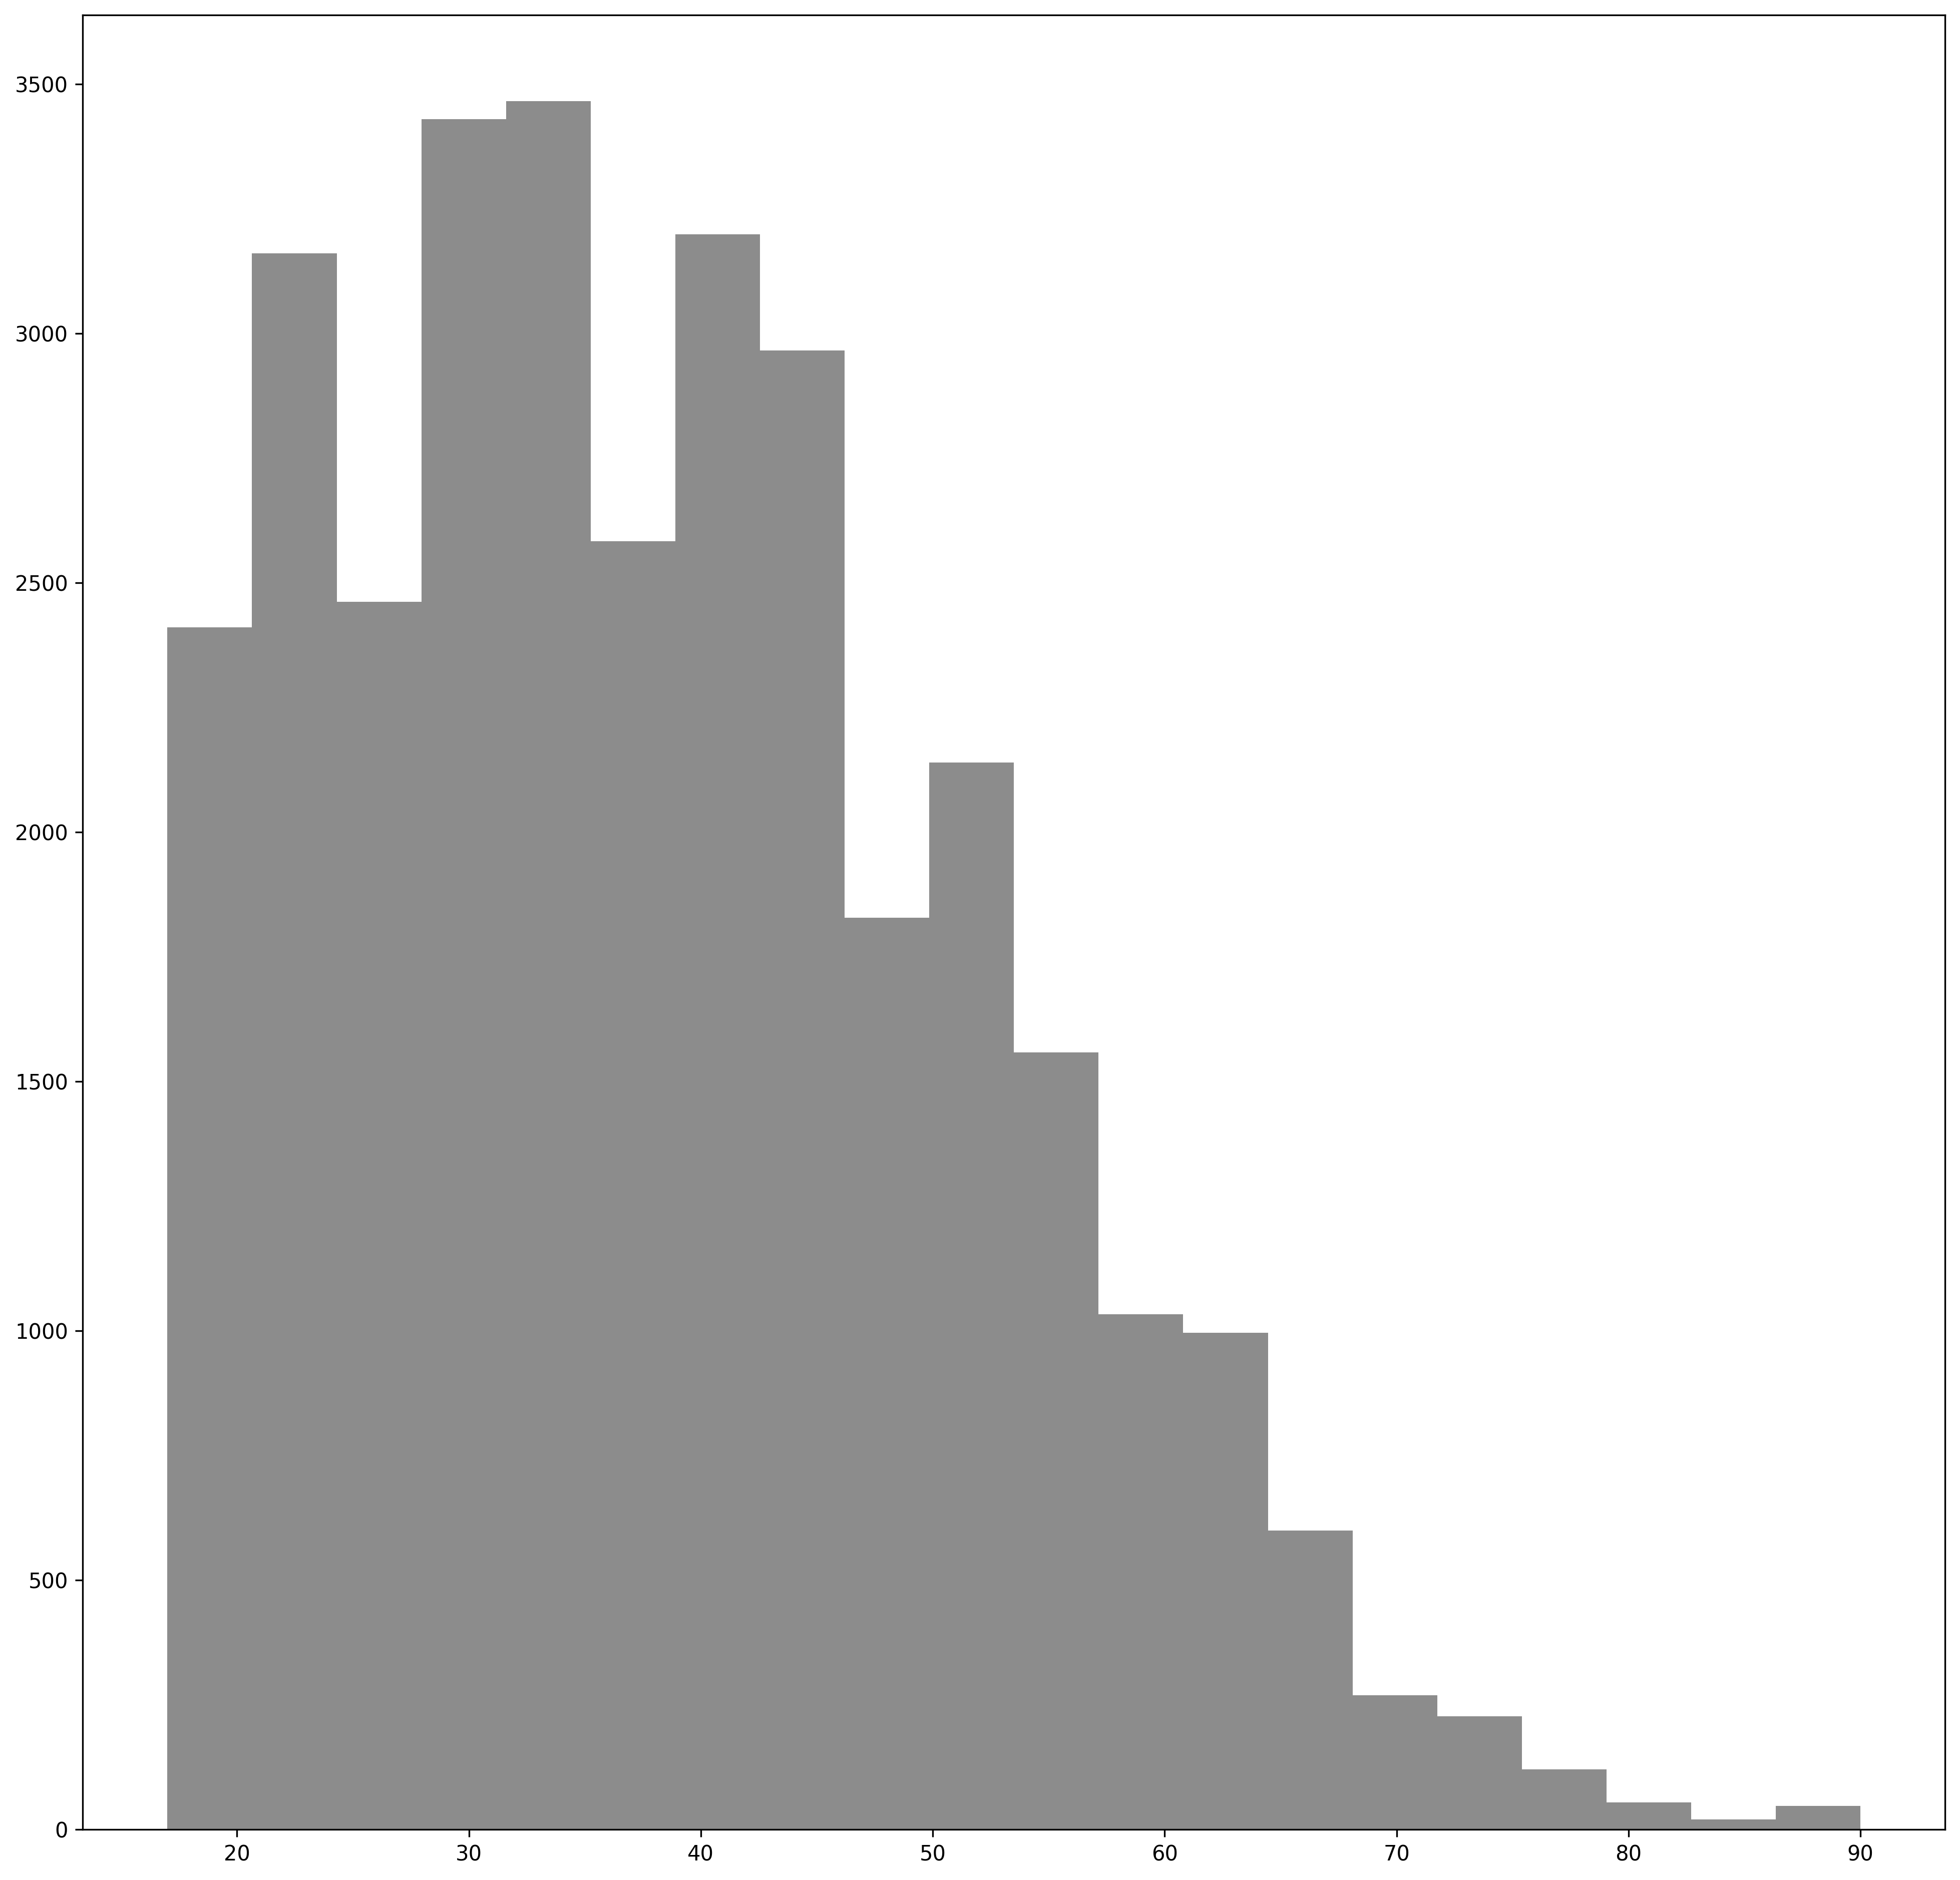

In [11]:
plt.figure(figsize=[16, 16], dpi=300)
plt.hist(sub_set['age'], bins=20, color='#8C8C8C')
plt.show()

In [17]:
def formatting_space_char(str):
    temp = str.split('-')
    temp = ' '.join(temp)

    return temp

In [22]:
sub_set['occupation_temp'] = sub_set['occupation'].apply(formatting_space_char)
sub_set['education_temp'] = sub_set['education'].apply(formatting_space_char)
sub_set.head(5)

c:\users\ashen\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\ashen\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,age,education,occupation,occupation_temp,education_temp
0,39,Bachelors,Adm-clerical,Adm clerical,Bachelors
1,50,Bachelors,Exec-managerial,Exec managerial,Bachelors
2,38,HS-grad,Handlers-cleaners,Handlers cleaners,HS grad
3,53,11th,Handlers-cleaners,Handlers cleaners,11th
4,28,Bachelors,Prof-specialty,Prof specialty,Bachelors


In [23]:
income['workClass_temp'] = income['work class'].apply(formatting_space_char)
income['education_temp'] = income['education'].apply(formatting_space_char)
income['maritalStatus_temp'] = income['marital status'].apply(formatting_space_char)
income['occupation_temp'] = income['occupation'].apply(formatting_space_char)
income['relationship_temp'] = income['relationship'].apply(formatting_space_char)
income['nativeCountry_temp'] = income['native country'].apply(formatting_space_char)
income

,age,work class,fnlwgt,education,education num,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours-per-week,native country,workClass_temp,education_temp,maritalStatus_temp,occupation_temp,relationship_temp,nativeCountry_temp
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,State gov,Bachelors,Never married,Adm clerical,Not in family,United States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,Self emp not inc,Bachelors,Married civ spouse,Exec managerial,Husband,United States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,Private,HS grad,Divorced,Handlers cleaners,Not in family,United States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,Private,11th,Married civ spouse,Handlers cleaners,Husband,United States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,Private,Bachelors,Married civ spouse,Prof specialty,Wife,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,Private,Assoc acdm,Married civ spouse,Tech support,Wife,United States
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,Private,HS grad,Married civ spouse,Machine op inspct,Husband,United States
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,Private,HS grad,Widowed,Adm clerical,Unmarried,United States
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,Private,HS grad,Never married,Adm clerical,Own child,United States


In [26]:
income_format = income.drop(['work class', 'education', 'marital status', 'occupation',
             'relationship', 'native country'], axis=1)
income_format.head(5)

,age,fnlwgt,education num,race,sex,capital gain,capital loss,hours-per-week,workClass_temp,education_temp,maritalStatus_temp,occupation_temp,relationship_temp,nativeCountry_temp
0,39,77516,13,White,Male,2174,0,40,State gov,Bachelors,Never married,Adm clerical,Not in family,United States
1,50,83311,13,White,Male,0,0,13,Self emp not inc,Bachelors,Married civ spouse,Exec managerial,Husband,United States
2,38,215646,9,White,Male,0,0,40,Private,HS grad,Divorced,Handlers cleaners,Not in family,United States
3,53,234721,7,Black,Male,0,0,40,Private,11th,Married civ spouse,Handlers cleaners,Husband,United States
4,28,338409,13,Black,Female,0,0,40,Private,Bachelors,Married civ spouse,Prof specialty,Wife,Cuba


In [29]:
income_format[(income_format['age'] > 30) & (income_format['age'] < 50)].reset_index(drop=True)

,age,fnlwgt,education num,race,sex,capital gain,capital loss,hours-per-week,workClass_temp,education_temp,maritalStatus_temp,occupation_temp,relationship_temp,nativeCountry_temp
0,39,77516,13,White,Male,2174,0,40,State gov,Bachelors,Never married,Adm clerical,Not in family,United States
1,38,215646,9,White,Male,0,0,40,Private,HS grad,Divorced,Handlers cleaners,Not in family,United States
2,37,284582,14,White,Female,0,0,40,Private,Masters,Married civ spouse,Exec managerial,Wife,United States
3,49,160187,5,Black,Female,0,0,16,Private,9th,Married spouse absent,Other service,Not in family,Jamaica
4,31,45781,14,White,Female,14084,0,50,Private,Masters,Never married,Prof specialty,Not in family,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14922,43,27242,10,White,Male,0,0,50,Self emp not inc,Some college,Married civ spouse,Craft repair,Husband,United States
14923,32,34066,6,Amer-Indian-Eskimo,Male,0,0,40,Private,10th,Married civ spouse,Handlers cleaners,Husband,United States
14924,43,84661,11,White,Male,0,0,45,Private,Assoc voc,Married civ spouse,Sales,Husband,United States
14925,32,116138,14,Asian-Pac-Islander,Male,0,0,11,Private,Masters,Never married,Tech support,Not in family,Taiwan


In [39]:
income_format[['education_temp', 'age']].groupby(by='education_temp').mean()[:]

,age
education_temp,
10th,37.429796
11th,32.355745
12th,32.000000
1st 4th,46.142857
5th 6th,42.885886
7th 8th,48.445820
9th,41.060311
Assoc acdm,37.381443
Assoc voc,38.553546


In [45]:
income_format.groupby(by='occupation_temp').describe()['age']

,count,mean,std,min,25%,50%,75%,max
occupation_temp,,,,,,,,
?,1843.0,40.882800,20.336350,17.0,21.0,35.0,61.0,90.0
Adm clerical,3770.0,36.964456,13.362998,17.0,26.0,35.0,46.0,90.0
Armed Forces,9.0,30.222222,8.089774,23.0,24.0,29.0,34.0,46.0
Craft repair,4099.0,39.031471,11.606436,17.0,30.0,38.0,47.0,90.0
Exec managerial,4066.0,42.169208,11.974548,17.0,33.0,41.0,50.0,90.0
Farming fishing,994.0,41.211268,15.070283,17.0,29.0,39.0,52.0,90.0
Handlers cleaners,1370.0,32.165693,12.372635,17.0,23.0,29.0,39.0,90.0
Machine op inspct,2002.0,37.715285,12.068266,17.0,28.0,36.0,46.0,90.0
Other service,3295.0,34.949621,14.521508,17.0,22.0,32.0,45.0,90.0


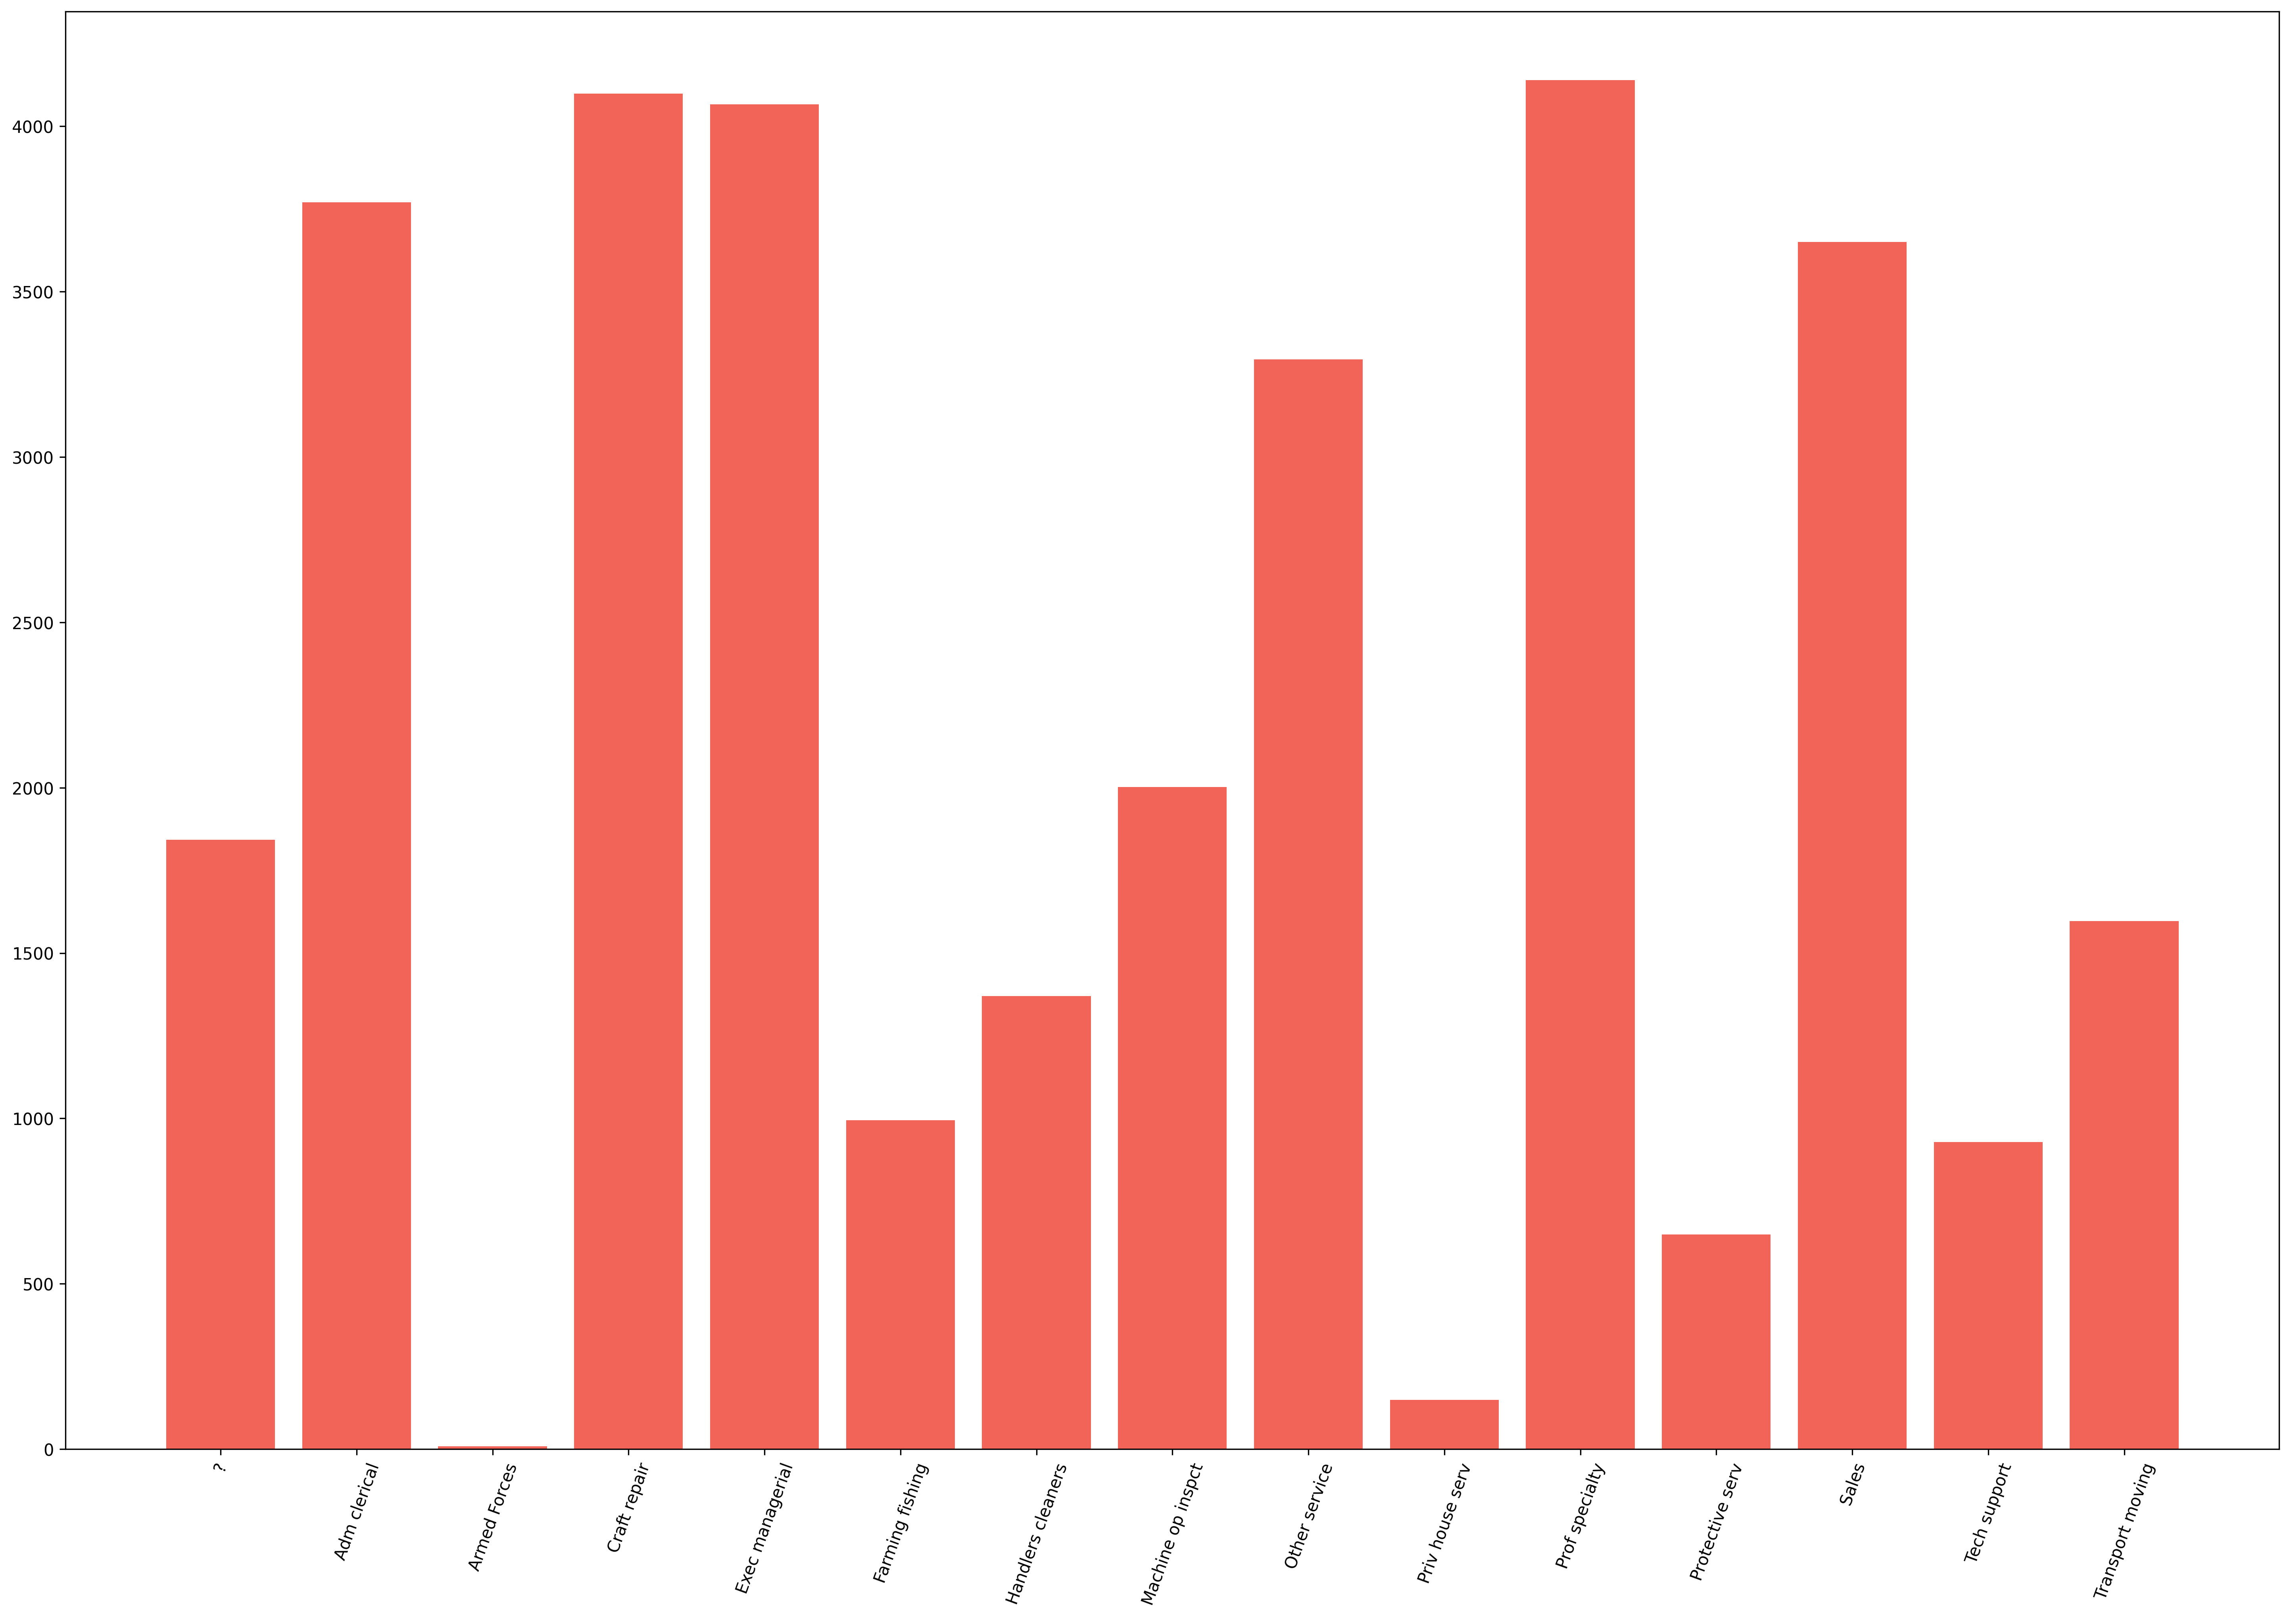

In [49]:
income_format_states = income_format.groupby(by='occupation_temp').describe()['age']
plt.figure(figsize=[24, 16], dpi=300)
plt.bar(x=income_format_states.index, height=income_format_states['count'], color='#F26457')
plt.xticks(income_format_states.index, rotation=70)
plt.show()